In [731]:
import cv2 as cv
import numpy as np
import copy
from  matplotlib import pyplot as plt
%matplotlib inline

(32, 1040, 3)
<class 'numpy.ndarray'>


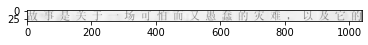

In [732]:
img = cv.imread('./images/text.jpg')
print(img.shape)
print(type(img))
plt.imshow(img[:,:,::-1])
#cv.imshow('raw image', img)
#cv.waitKey(0)
#cv2.destroyWindow('raw image')


(32, 1040)
(32, 1040)


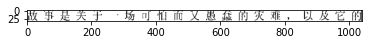

In [733]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape)
thresh, img = cv.threshold(img, 200, 255, cv.THRESH_BINARY)
print(img.shape)
plt.imshow(img, 'gray')

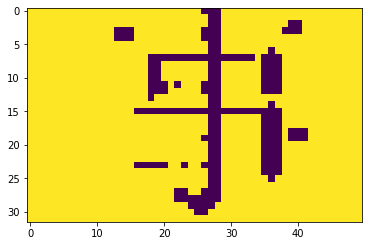

In [734]:
sc = img[:,40:90]
plt.imshow(sc)

In [735]:
pts = (np.array(np.where(sc==0))).T

In [736]:
cv.minAreaRect(pts)

((14.631082534790039, 28.33648681640625),
 (29.632890701293945, 26.981525421142578),
 8.972626686096191)

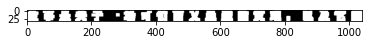

In [737]:
kernel = np.ones((3, 3), np.uint8)
img = cv.dilate(255 - img, kernel, iterations=4)
plt.imshow(img, 'gray')

In [738]:
n_area, labels, stats, mass_center = cv.connectedComponentsWithStats(img, connectivity=4)
#cv.connectedComponents()

# 每个连通区域的灰度都有对应的数值。第 i (i = 0,1,2..., n_area-1) 个连通区域的每个像素点灰度值都为 i.    这里有 n_area 个连通区域，背景是第0个。 

In [739]:
print(n_area)
print(stats)
print(labels.shape)
print(labels)
print(labels[3][10:100])
print(labels[5][400:500])

22
[[    0     0  1022    32 13818]
 [    0     0    36    32  1060]
 [   49     0    37    32   996]
 [   99     0    38    32  1016]
 [  149     0    38    32  1073]
 [  200     0    37    32   816]
 [  300     0    38    32  1082]
 [  354     0    34    32   800]
 [  401     0    36    32  1008]
 [  451     0    37    32  1048]
 [  502     0    36    32   853]
 [  552     0    37    32  1033]
 [  602     0    38    32  1141]
 [  654     0    35    32  1067]
 [  702     0    37    32  1058]
 [  753     0    37    32  1079]
 [  856     0    34    32   984]
 [  904     0    37    32   971]
 [  953     0    38    32   991]
 [ 1006     0    34    32  1076]
 [  276     9    12    10   119]
 [  805    17    13    15   191]]
(32, 1040)
[[ 0  0  0 ... 19 19 19]
 [ 0  0  0 ... 19 19 19]
 [ 0  0  0 ... 19 19 19]
 ...
 [ 1  1  1 ... 19 19 19]
 [ 1  1  1 ... 19 19 19]
 [ 1  1  1 ... 19 19 19]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2

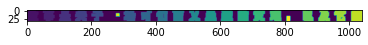

In [740]:
plt.imshow(labels)

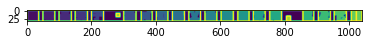

In [741]:
labels_copy = copy.deepcopy(labels)
for i, stat in enumerate(stats):
    cv.rectangle(labels_copy, (stat[0], stat[1]), (stat[0] + stat[2], stat[1] + stat[3]), (25, 25, 255), 3)

plt.imshow(labels_copy)


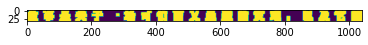

In [742]:
plt.imshow(img)

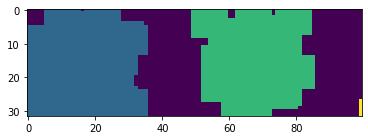

In [743]:
plt.imshow(labels[:,:100])

In [744]:
single_char = labels[:,40:90]
print(single_char)
print(single_char[10,:])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0]


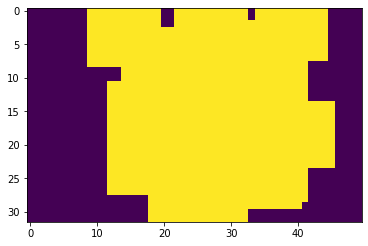

In [745]:
plt.imshow(single_char)

In [746]:
pts = (np.array(np.where(single_char>0))).T

In [747]:
cv.minAreaRect(pts)

((15.5, 27.0), (36.0, 31.0), 90.0)

In [748]:
# cv.minAreaRect()
# cv.findContours()